In [15]:
import pandas as pd
import json
import seaborn as sns

In [10]:
df = pd.read_csv('latency.csv')
for i in df:
    df[i] = df[i].apply(lambda x: eval(x))

df = df.melt(var_name='Size_ID', value_name='Details')
df = df.join(df['Details'].apply(pd.Series))
df.drop(columns=['Details'], inplace=True)
df.rename(columns={"download_latency": "latency"}, inplace=True)
df["src_vendor"] = df["src_region"].apply(lambda x: x.split(":")[0])
df["src_region"] = df["src_region"].apply(lambda x: x.split(":")[1])
df["dest_vendor"] = df["dst_bucket_region"].apply(lambda x: x.split(":")[0])
df["dest_region"] = df["dst_bucket_region"].apply(lambda x: x.split(":")[1])


In [11]:
file_sizes = df["file_size"].unique()
display(file_sizes)

array([ 10485760,  20971520,  41943040,  83886080, 167772160, 335544320])

In [12]:
for file_size in file_sizes:
    df_latency = df[df["file_size"] == file_size].pivot_table(index=['src_vendor','src_region', 'dest_vendor', 'dest_region'], values=['latency'], aggfunc='min')
    df_latency.to_csv(f'latency_{file_size}.csv')
    print(df_latency)

                                                  latency
src_vendor src_region dest_vendor dest_region            
aws        af-south-1 aws         af-south-1        1.288
                                  ap-east-1         3.716
                                  ap-northeast-1    5.363
                                  ap-northeast-2    6.183
                                  ap-northeast-3    5.193
...                                                   ...
           us-west-1  aws         me-central-1      3.756
                                  me-south-1        3.327
                                  sa-east-1         2.816
                                  us-east-1         1.321
                                  us-west-1         0.586

[289 rows x 1 columns]
                                                  latency
src_vendor src_region dest_vendor dest_region            
aws        af-south-1 aws         af-south-1        1.813
                                  ap-east-1     

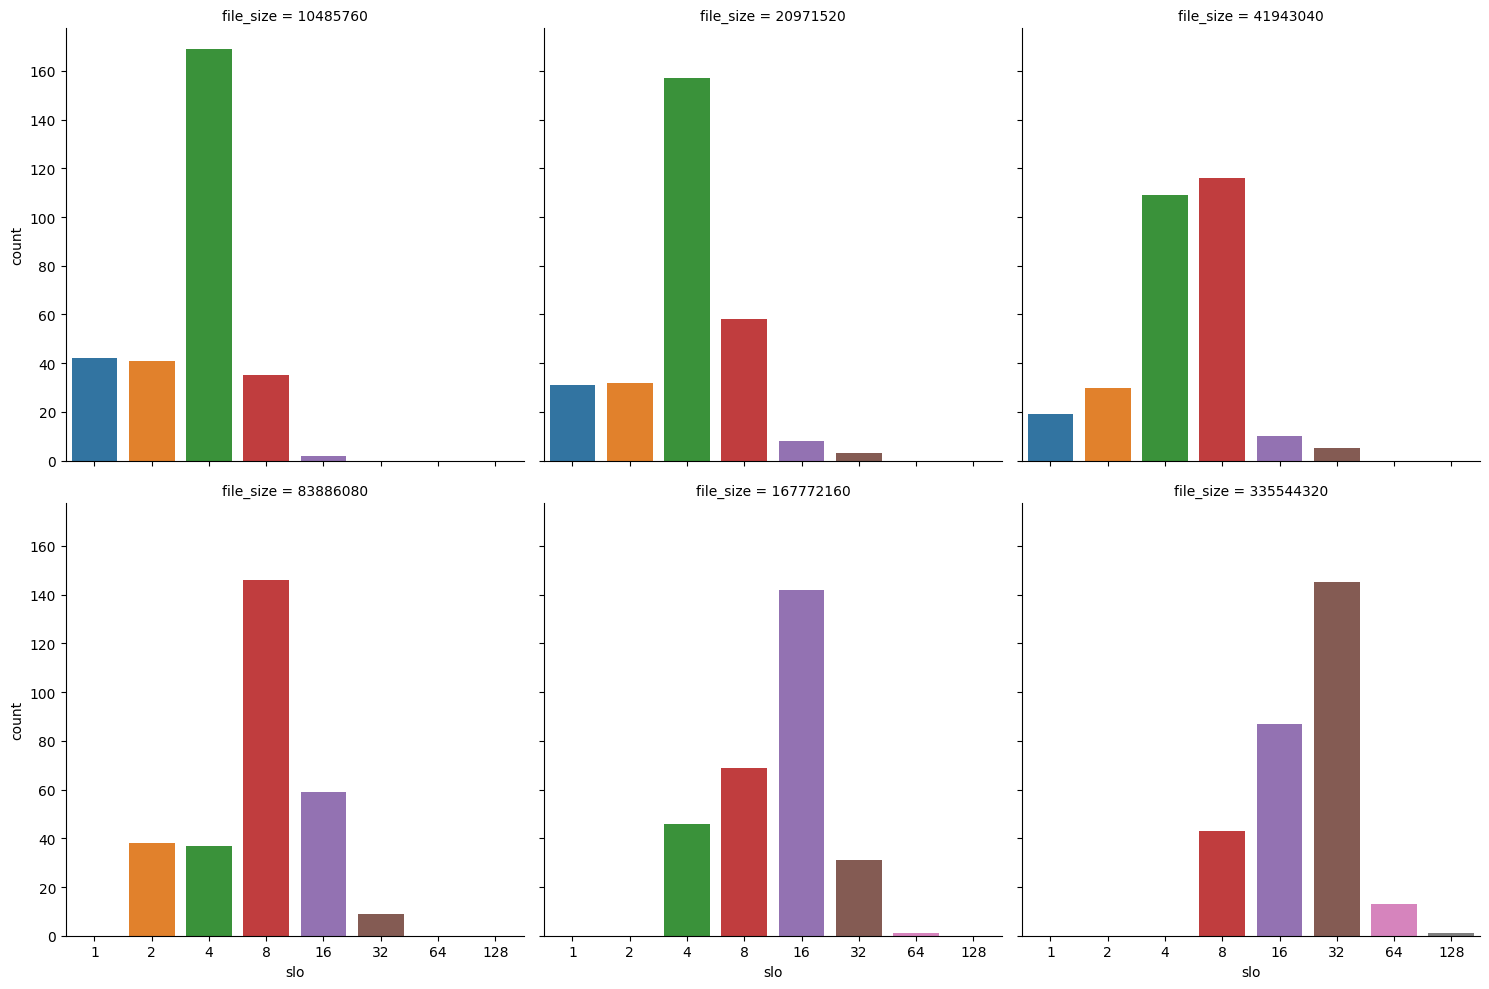

In [23]:
# Simulate slos

# Number of compatible object stores under given SLOs and object size
slos = [1, 2, 4, 8, 16, 32, 64, 128]
def map_to_slo(latency):
    for slo in slos:
        if latency <= slo:
            return slo
    return 9999999

df["slo"] = df["latency"].apply(map_to_slo)

sns.catplot(x="slo", kind="count", data=df, col="file_size", col_wrap=3)
